In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr

## Preparing Data

In [2]:
import array
#EEA CO2, CH4, N2O data
Cumulative_GHG_Data = 'Climate Change Analysis/Datasets/Individual Datasets/Necessary Aerosol Datasets/GHG_atmospheric_concentration.csv'
GHGcsv = pd.read_csv(Cumulative_GHG_Data)

CO2data1 = GHGcsv.CO2_EEA
CH4data = GHGcsv.CH4
N2Odata = GHGcsv.N2O

CH4_ppb = GHGcsv.CH4_ppb
N2O_ppb = GHGcsv.N2O_ppb

x = GHGcsv.Year
features = ['Year', 'time']
GHG_X = GHGcsv[features]
GHGtime = GHGcsv.time

In [3]:
#NASA GISS CO2 data
CO2_Comprehensive_Data = 'Climate Change Analysis/Datasets/Stage 1/Gas Concentration/co2_concentration.csv'
CO2csv = pd.read_csv(CO2_Comprehensive_Data)

CO2data_avg = CO2csv.average
CO2data_interpolated = CO2csv.interpolated
#CO2data_trended = CO2csv.trended

CO2_x = CO2csv.decimal_year
CO2features = ['Year', 'time']
CO2_X = CO2csv[features]
CO2time = CO2csv.timeRelativeTo1750

In [4]:
#AFEAS CFC data
#If time permitted

#CFC11
CFC11_Production_Data = 'Climate Change Analysis/Datasets/Individual Datasets/Necessary Aerosol Datasets/CFC11.csv'
CFC11csv = pd.read_csv(CFC11_Production_Data)
#print(CFC11csv)

#CFC12
CFC12_Production_Data = 'Climate Change Analysis/Datasets/Individual Datasets/Necessary Aerosol Datasets/CFC12.csv'
CFC12csv = pd.read_csv(CFC12_Production_Data)
#print(CFC12csv)

CFC11data_production = CFC11csv.TotalProduction
CFC11data_release = CFC11csv.TotalReleased
CFC12data_production = CFC12csv.TotalProduction
CFC12data_release = CFC12csv.TotalReleased

CFC_x = CFC11csv.Year

## Graphical Projections

##### Anthropogenic Gas Concentration Graphical Projections

In [6]:
'''#Cumulative GHG trends since 1750
# Observation of Correlation between SST and PDI
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1, = ax1.plot(x, CO2data1, label="Carbon Dioxide Concentration (ppm)", color="y")
line2, = ax2.plot(x, CH4_ppb, label="Methane Concentration (ppb)", color="g")
line3, = ax2.plot(x, N2O_ppb, label="Nitrous Oxide (ppb)", color="b")

curves = [line1, line2, line3]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Increase in Three Key Anthropogenic Gas Emissions (EEA. 1750-2019)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1750', color='k')
ax1.set_ylabel('Gas Concentration (Parts per Million)', color='y')
ax1.tick_params(axis='y', colors='y')
ax2.set_ylabel('Concentration (Parts per Billion)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()'''

'#Cumulative GHG trends since 1750\n# Observation of Correlation between SST and PDI\nfig, ax1 = plt.subplots()\nax2 = ax1.twinx()\n\nline1, = ax1.plot(x, CO2data1, label="Carbon Dioxide Concentration (ppm)", color="y")\nline2, = ax2.plot(x, CH4_ppb, label="Methane Concentration (ppb)", color="g")\nline3, = ax2.plot(x, N2O_ppb, label="Nitrous Oxide (ppb)", color="b")\n\ncurves = [line1, line2, line3]\n\nax1.legend(curves, [curve.get_label() for curve in curves])\n\nplt.title(\'Increase in Three Key Anthropogenic Gas Emissions (EEA. 1750-2019)\')\n#plt.ylabel(\'Amount of Carbon Dioxide in ppm\')\nax1.set_xlabel(\'Years since 1750\', color=\'k\')\nax1.set_ylabel(\'Gas Concentration (Parts per Million)\', color=\'y\')\nax1.tick_params(axis=\'y\', colors=\'y\')\nax2.set_ylabel(\'Concentration (Parts per Billion)\', color=\'g\')\nax2.tick_params(axis=\'y\', colors=\'g\')\nax1.grid()\n#plt.legend([\'Average Temperature Variation\', \'Carbon Emissions\'])\nplt.show()'

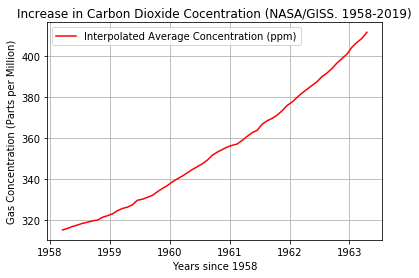

'fig, ax1 = plt.subplots()\n\nline1, = ax1.plot(CO2_x[504:], CO2data_interpolated[504:], label="Interpolated Average Concentration (ppm)", color="r")\nline2, = ax1.plot(CO2_x[504:], CO2data_trended[504:], label="Trended Average Concentration (ppm)", color="g")\n\ncurves = [line1, line2]\n\nax1.legend(curves, [curve.get_label() for curve in curves])\n\nplt.title(\'Increase in Carbon Dioxide Cocentration (NASA/GISS. 2000-2019)\')\n#plt.ylabel(\'Amount of Carbon Dioxide in ppm\')\nax1.set_xlabel(\'Years since 1958\', color=\'k\')\nax1.set_ylabel(\'Gas Concentration (Parts per Million)\', color=\'k\')\nax1.tick_params(axis=\'y\', colors=\'k\')\nax1.grid()\n#plt.legend([\'Average Temperature Variation\', \'Carbon Emissions\'])\nplt.show()'

In [7]:
#NASA/GISS CO2 trends since 1958
fig, ax1 = plt.subplots()

line1, = ax1.plot(CO2_x, CO2data_interpolated, label="Interpolated Average Concentration (ppm)", color="r")

curves = [line1]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Increase in Carbon Dioxide Cocentration (NASA/GISS. 1958-2019)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='k')
ax1.set_ylabel('Gas Concentration (Parts per Million)', color='k')
ax1.tick_params(axis='y', colors='k')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

'''fig, ax1 = plt.subplots()

line1, = ax1.plot(CO2_x[504:], CO2data_interpolated[504:], label="Interpolated Average Concentration (ppm)", color="r")
line2, = ax1.plot(CO2_x[504:], CO2data_trended[504:], label="Trended Average Concentration (ppm)", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Increase in Carbon Dioxide Cocentration (NASA/GISS. 2000-2019)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='k')
ax1.set_ylabel('Gas Concentration (Parts per Million)', color='k')
ax1.tick_params(axis='y', colors='k')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()'''

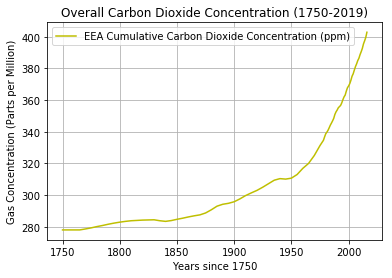

'fig, ax1 = plt.subplots()\n\nline1, = ax1.plot(x[60:], CO2data1[60:], label="EEA Cumulative Carbon Dioxide Concentration (ppm)", color="y")\nline2, = ax1.plot(CO2_x[504:], CO2data_interpolated[504:], label="GISS Interpolated Average Concentration (ppm)", color="r")\n#line3, = ax1.plot(CO2_x[504:], CO2data_trended[504:], label="GISS Trended Average Concentration (ppm)", color="g")\n\ncurves = [line1, line2]\n\nax1.legend(curves, [curve.get_label() for curve in curves])\n\nplt.title(\'Overall Carbon Dioxide Concentration (2000-2019)\')\n#plt.ylabel(\'Amount of Carbon Dioxide in ppm\')\nax1.set_xlabel(\'Years since 1750\', color=\'k\')\nax1.set_ylabel(\'Gas Concentration (Parts per Million)\', color=\'k\')\nax1.tick_params(axis=\'y\', colors=\'k\')\nax1.grid()\n#plt.legend([\'Average Temperature Variation\', \'Carbon Emissions\'])\nplt.show()'

In [10]:
#Overall CO2 trends since 1750
fig, ax1 = plt.subplots()

line1, = ax1.plot(x, CO2data1, label="EEA Cumulative Carbon Dioxide Concentration (ppm)", color="y")
#ine2, = ax1.plot(CO2_x, CO2data_interpolated, label="GISS Interpolated Average Concentration (ppm)", color="r")
#line3, = ax1.plot(CO2_x, CO2data_interpolated, label="GISS Interpolated Average Concentration (ppm)", color="g")

curves = [line1]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Overall Carbon Dioxide Concentration (1750-2019)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1750', color='k')
ax1.set_ylabel('Gas Concentration (Parts per Million)', color='k')
ax1.tick_params(axis='y', colors='k')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

'''fig, ax1 = plt.subplots()

line1, = ax1.plot(x[60:], CO2data1[60:], label="EEA Cumulative Carbon Dioxide Concentration (ppm)", color="y")
line2, = ax1.plot(CO2_x[504:], CO2data_interpolated[504:], label="GISS Interpolated Average Concentration (ppm)", color="r")
#line3, = ax1.plot(CO2_x[504:], CO2data_trended[504:], label="GISS Trended Average Concentration (ppm)", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Overall Carbon Dioxide Concentration (2000-2019)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1750', color='k')
ax1.set_ylabel('Gas Concentration (Parts per Million)', color='k')
ax1.tick_params(axis='y', colors='k')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()'''

In [44]:
#Overall Anthropogenic Gas Trends since 1750

##### Anthropogenic Aerosol Concentration Projections

In [12]:
#CFC Release Trends Since 1931
'''fig, ax1 = plt.subplots()

line1, = ax1.plot(CFC_x, CFC11data_release, label="CFC 11 Total Release (tonnes)", color="c")
line2, = ax1.plot(CFC_x, CFC12data_release, label="CFC 12 Total Release (tonnes)", color="m")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])
plt.title('Increase in Chlorofluorocarbon Emissions (AFEAS. 1931-2019)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1931', color='k')
ax1.set_ylabel('Gas Concentration (Metric Tonnes)', color='k')
ax1.tick_params(axis='y', colors='k')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()'''

'fig, ax1 = plt.subplots()\n\nline1, = ax1.plot(CFC_x, CFC11data_release, label="CFC 11 Total Release (tonnes)", color="c")\nline2, = ax1.plot(CFC_x, CFC12data_release, label="CFC 12 Total Release (tonnes)", color="m")\n\ncurves = [line1, line2]\n\nax1.legend(curves, [curve.get_label() for curve in curves])\nplt.title(\'Increase in Chlorofluorocarbon Emissions (AFEAS. 1931-2019)\')\n#plt.ylabel(\'Amount of Carbon Dioxide in ppm\')\nax1.set_xlabel(\'Years since 1931\', color=\'k\')\nax1.set_ylabel(\'Gas Concentration (Metric Tonnes)\', color=\'k\')\nax1.tick_params(axis=\'y\', colors=\'k\')\nax1.grid()\n#plt.legend([\'Average Temperature Variation\', \'Carbon Emissions\'])\nplt.show()'

## Creating New Dataset Values

### Entropy of Anthropogenic Emissions in Upper Troposhphere and Lower Stratosphere

###### Entropy of CFC in Isothermal Stratospheric System

In [16]:
import math
# P2 (kPa) = 22.65e ^ (1.73 - (0.000157 * 11,000 m))
# pstrat = pressure of stratosphere
# z = average height of CFC

# All pressure measurements n in kilopascals

z = 18000
e = math.e
pstrat = 22.65*(e)**(1.73 - (0.000157 * z))
ptrop = 22.68

In [17]:
#Entropy of Isothermal (stratospheric) system

r = 8.314 #gas pressure constant Joules/molK for kPa

CFC11array = CFC11data_release.to_numpy()
CFC12array = CFC12data_release.to_numpy()

cfc11mm = 137.37 #molar mass
cfc12mm = 120.91

cfc11mol = list()
cfc12mol = list()
for i in CFC11array:
    gram = i * (math.pow(10, 6))
    cfc11mol.append(gram/(cfc11mm))
    
for o in CFC12array:
    gramm = o * (math.pow(10, 6))
    cfc12mol.append(gramm/(cfc12mm))
    
cfcmol = list() # combined moles of both gases
for p in range(len(cfc11mol)):
    combined = cfc11mol[p] + cfc12mol[p]
    cfcmol.append(combined)

cfcEntropy = list()
for a in cfcmol:
    cfcEntropy.append((a*r)*math.log(101.29/pstrat))
    
#print(cfcEntropy)

###### Entropy of CO2 in reversible adiabatic thermal expansion environment of Troposphere

In [18]:
co2 = CO2data_interpolated[:62].to_numpy()
print(co2)

[315.241     315.9741667 316.9075    317.6375    318.4508333 318.9941667
 319.6175    320.0441667 321.3833333 322.1575    323.045     324.6241667
 325.68      326.32      327.4533333 329.6766667 330.1841667 331.115
 332.04      333.8316667 335.4033333 336.8416667 338.6258333 340.105
 341.4475    343.0541667 344.6508333 346.0175    347.42      349.1941667
 351.5666667 353.1208333 354.3941667 355.6075    356.4458333 357.1
 358.8325    360.82      362.6066667 363.7291667 366.7       368.3775
 369.5491667 371.1433333 373.2791667 375.8016667 377.5225    379.7958333
 381.8958333 383.7916667 385.6041667 387.43      389.8991667 391.6525
 393.8533333 396.5208333 398.6475    400.8341667 404.2391667 406.5533333
 408.5216667 411.524    ]


In [19]:
# according to Clark. W. C., 1 ppm C = 2.31 Gt C
co2Gram = list()
for i in co2:
    gt = i * 2.31
    g = gt * (math.pow(10, 15))
    co2Gram.append("{:.2e}".format(g))

co2mol = list()
for o in co2Gram:
    co2mol.append(float(o)/44.01)
    
#len(co2mol)
#print(co2mol)

In [50]:
sstNew = './sstNew.csv'
sst = pd.read_csv(sstNew)
sst = sst.iloc[:,1]

In [63]:
# Heat capacity of Carbon Dioxide at constant volume = 28.2 J/K

co2entropy = list()
for s in sst:
    co2entropy.append((28.2 * math.log(((float(s) + 273) - (0.0065 * 11000)) / (float(s) + 273))) + (r * math.log(101.29/pstrat)))

#print(len(co2entropy))

co2entropyFinal = list()
for x in range(len(co2mol)):
    co2entropyFinal.append(co2mol[x] * co2entropy[x])
    
print(co2entropyFinal)
pd.DataFrame(co2entropyFinal).to_csv("./entropy.csv")

[2.3005153391183405e+17, 2.3068354362038304e+17, 2.3133338198413616e+17, 2.319892806417861e+17, 2.3260816821458826e+17, 2.3291629055311e+17, 2.332323235117981e+17, 2.3352639251924195e+17, 2.344744022317693e+17, 2.3510640870678755e+17, 2.3570889864270176e+17, 2.369936413789479e+17, 2.376256244226251e+17, 2.3826788977521642e+17, 2.3889990009292256e+17, 2.4077842218030336e+17, 2.4109440436164234e+17, 2.4172636872432032e+17, 2.4234151311969347e+17, 2.4360535412683658e+17, 2.4496880426315574e+17, 2.4586767510408938e+17, 2.4704896315641226e+17, 2.4831264071731466e+17, 2.4926765566530195e+17, 2.5021004957391648e+17, 2.5148328439384266e+17, 2.52465815018146e+17, 2.5372479860755312e+17, 2.5498868303399178e+17, 2.5662087079346234e+17, 2.5788501301411984e+17, 2.5882457037915453e+17, 2.594005236767996e+17, 2.6003243725457498e+17, 2.606643508323504e+17, 2.619281779879012e+17, 2.6319200514345197e+17, 2.64849554504459e+17, 2.6548165367988733e+17, 2.6769400079388637e+17, 2.6898304790239418e+17, 2.6989

In [66]:
co2entropyFinal[52]

2.8488754682662266e+17